In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing Housing.csv
df = pd.read_csv('50_Startups.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df.shape

(50, 5)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


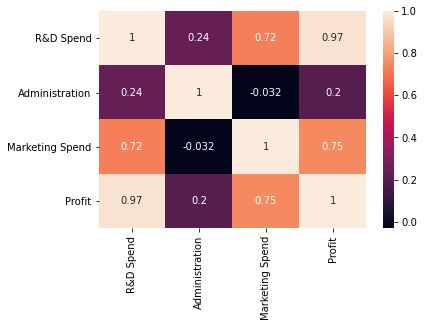

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
df['State'].nunique()

3

In [12]:
df['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

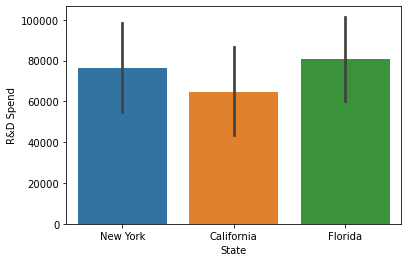

In [13]:
sns.barplot(x='State',y='R&D Spend',data=df)

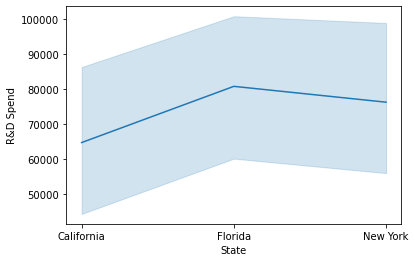

In [14]:
sns.lineplot(x='State',y='R&D Spend',data=df)

In [15]:
#  florida spand more in R&D 

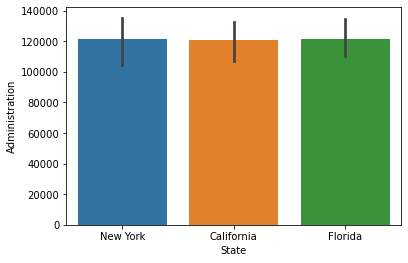

In [16]:
sns.barplot(x='State',y='Administration',data=df)

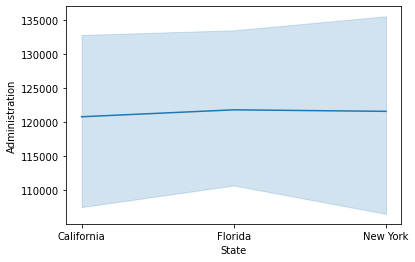

In [17]:
sns.lineplot(x='State',y='Administration',data=df)

In [18]:
# spend on Administration is equal for all state

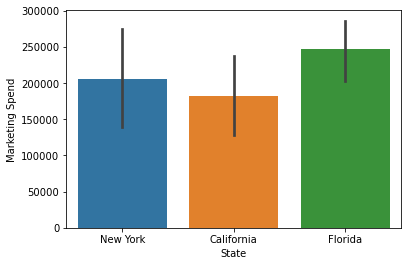

In [19]:
sns.barplot(x='State',y='Marketing Spend',data=df)

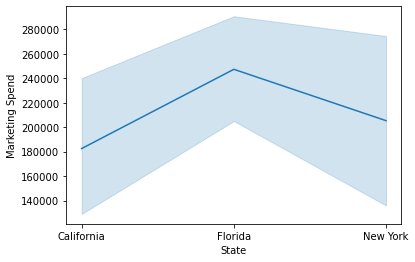

In [20]:
sns.lineplot(x='State',y='Marketing Spend',data=df)

In [21]:
#spand for Marketing is more for florida 

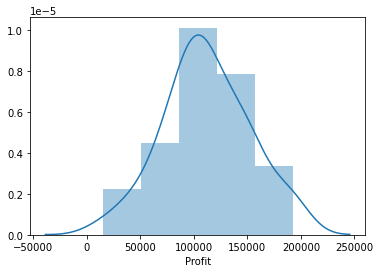

In [22]:
sns.distplot(df['Profit'],bins=5,kde=True)

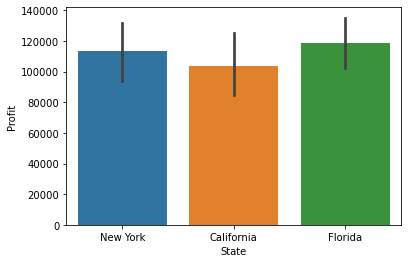

In [23]:
sns.barplot(x='State',y='Profit',data=df)

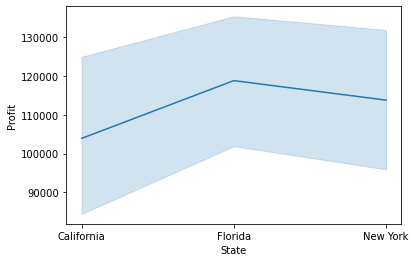

In [24]:
sns.lineplot(x='State',y='Profit',data=df)

In [25]:
# overall profit  is more for florida 

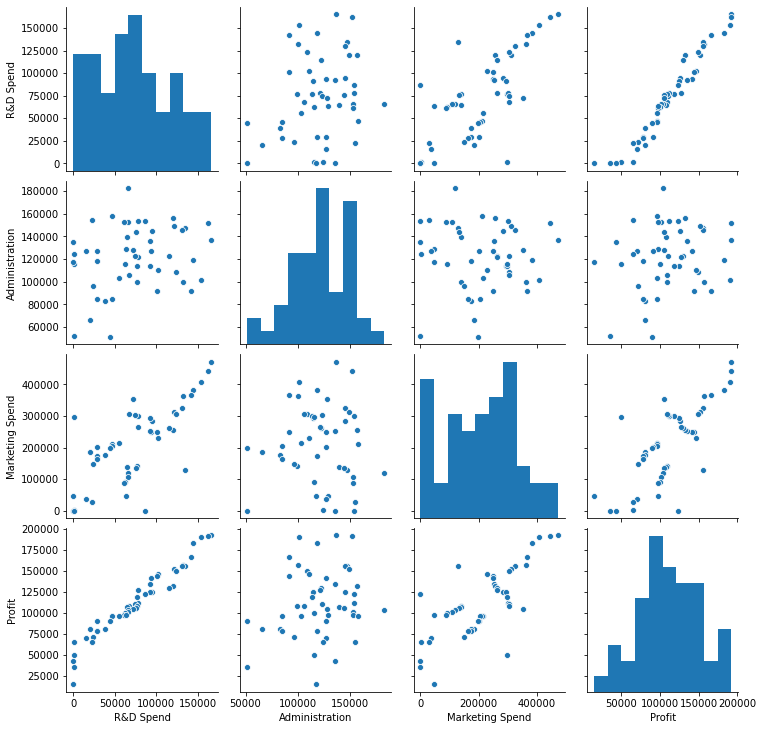

In [26]:
sns.pairplot(df)

In [27]:
# Training data

In [28]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [29]:
X=df[['R&D Spend', 'Administration', 'Marketing Spend']]
y=df['Profit']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6 ,test_size = 0.4, random_state=100)

In [31]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [32]:
print(lm.intercept_)
print(lm.coef_)

43599.91501845053
[0.83706531 0.00733667 0.02418271]


In [33]:
predictions = lm.predict(X_test)

In [34]:
pdd= pd.DataFrame(predictions,y_test)

In [35]:
pdd

,0
Profit,
156122.51,160450.334943
90708.19,73389.315386
89949.14,85630.294096
103282.38,103086.505120
69758.98,58373.098389
14681.40,45550.593852
156991.12,163496.771490
96778.92,95998.525641
118474.03,115487.298979


Text(0, 0.5, 'Predicted Y')

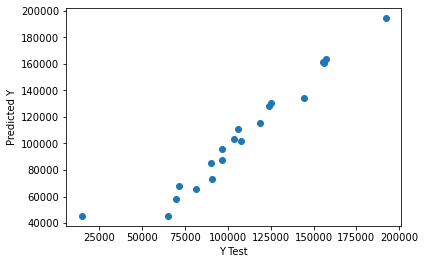

In [36]:
plt.scatter(x = y_test, y = predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [37]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8209.980770278777
MSE: 121274740.5473259
RMSE: 11012.481125855604


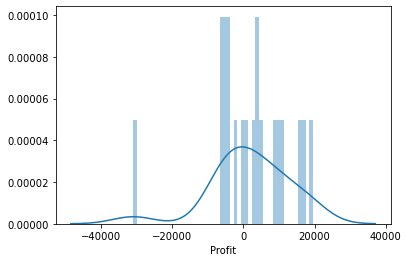

In [38]:
sns.distplot((y_test-predictions),bins=50);

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
r_squared = r2_score(y_test, predictions)

In [41]:
r_squared

0.9219387075529059